In [1]:
# the ROOT framework 
import ROOT as rt
# load the larcv library
from larcv import larcv
# load matplotlib for image viewing
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/02


In [2]:
# Load library containing SSNetDataLoader class
# returns 1 if successful
rt.gSystem.Load("../libssnetdata")

0

In [3]:
#  check if 'ssnet' namespace is available
# should see <class 'ROOT.ssnet'> is works
from ROOT import ssnet as ssnet # imports namespace from ROOT
print ssnet

<class 'ROOT.ssnet'>


In [4]:
# create instance of class with data
# should see: <ROOT.ssnet::SSNetDataLoader object at [random address]>
try:
    # clear out old loader
    del dataloader
except:
    pass
dataloader = ssnet.SSNetDataLoader()
print dataloader

<ROOT.ssnet::SSNetDataLoader object at 0x56269d39fba0>


In [5]:
# load input file
inputfile = "../test_10k.root"
dataloader.setup( inputfile, 0, True )

    [NORMAL]  <ssnetio::prepare_input> Opening a file in READ mode: ../test_10k.root
    [NORMAL]  <ssnetio::initialize> Prepared input with 10000 entries...
    [NORMAL]  <SSNetDataLoader::setup> meta: Plane 65535 (cols,rows) = (256,256) ... pixel (width,height)=(0,0) ... Left Top (x,y)=(0,0) ... Right Bottom (x,y)=(0,0)
    [NORMAL]  <SSNetDataLoader::setup> meta: Plane 65535 (cols,rows) = (256,256) ... pixel (width,height)=(0,0) ... Left Top (x,y)=(0,0) ... Right Bottom (x,y)=(0,0)
    [NORMAL]  <SSNetDataLoader::setup> meta: Plane 65535 (cols,rows) = (256,256) ... pixel (width,height)=(0,0) ... Left Top (x,y)=(0,0) ... Right Bottom (x,y)=(0,0)
    [NORMAL]  <SSNetDataLoader::setup> Ready to return images with (row,col) size of (256,256)


Warning in <TClass::Init>: no dictionary for class larcv::EventClusterPixel2D is available
Warning in <TClass::Init>: no dictionary for class larcv::ClusterPixel2D is available
Warning in <TClass::Init>: no dictionary for class larcv::VoxelSetArray is available
Warning in <TClass::Init>: no dictionary for class larcv::EventParticle is available
Warning in <TClass::Init>: no dictionary for class larcv::ParticleSet is available
Warning in <TClass::Init>: no dictionary for class larcv::Particle is available
Warning in <TClass::Init>: no dictionary for class larcv::VoxelSet is available
Warning in <TClass::Init>: no dictionary for class larcv::Voxel is available


In [6]:
datadict = dataloader.makeTrainingDataDict(1,2)

In [7]:
datadict.keys()

['label_t', 'image_t']

In [8]:
datadict['image_t'].shape

(1, 1, 256, 256)

65000


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


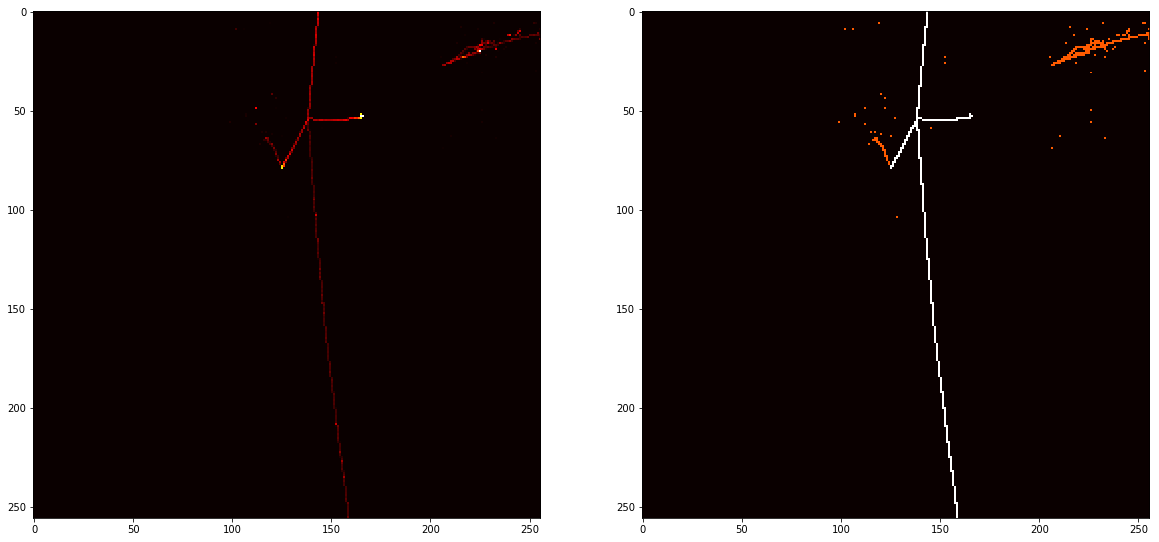

In [9]:
# get image and view image
datadict = dataloader.makeTrainingDataDict(1,2)
img = datadict['image_t']
print (img<10).sum()
img[img<10] = 0.0
img[img>1000] = 1000

fig, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].imshow(datadict['image_t'][0,0,:,:], cmap='hot', interpolation='nearest')
#ax[0].title('Pixel Values')


ax[1].imshow(datadict['label_t'][0,0,:,:], cmap='hot', interpolation='nearest')
#plt.imshow(datadict['label_t'][0,0,:,:], cmap='hot', interpolation='nearest')
#plt.title('Labels Values')
#plt.show()
fig.show()

In [10]:
# test throughput
from time import time
nbatches = 10
bsize=16
a = time()
dataloader.set_verbosity(larcv.msg.kCRITICAL)
dataloader.set_read_mode(ssnet.SSNetDataLoader.kSequential)  # 35 ms/batch of 16
#dataloader.set_read_mode(ssnet.SSNetDataLoader.kPartialRandom) # 64 ms/batch of 16
#dataloader.set_read_mode(ssnet.SSNetDataLoader.kRandomSubBatch) # 108 ms/batch of 16
#dataloader.set_read_mode(ssnet.SSNetDataLoader.kCompleteRandom) # 624 ms/batch of 16
dataloader.resetTimers()
for i in range(nbatches):
    if i%10==0:
        print "Batch ",i
    datadict = dataloader.makeTrainingDataDict(bsize,2)
b = time()
elapsed = float(b-a)
secs_per_batch = elapsed/float(nbatches)
print "elapsed: ",elapsed,"; secs per batch: ",secs_per_batch
print "total images loaded: ",nbatches*bsize,"; secs per image: ",elapsed/float(nbatches*bsize)
dt_read = dataloader.getReadTime()
dt_alloc = dataloader.getAllocTime()
dt_copy = dataloader.getCopyTime()
print "copy time per batch: ",dt_copy/float(nbatches)
print "alloc time per batch: ",dt_alloc/float(nbatches)
print "read time per batch: ",dt_read/float(nbatches)

Batch  0
elapsed:  0.342478990555 ; secs per batch:  0.0342478990555
total images loaded:  160 ; secs per image:  0.00214049369097
copy time per batch:  0.00451329946518
alloc time per batch:  3.44000029145e-05
read time per batch:  0.0358517020941


In [11]:
imgdata = datadict['image_t']
imgdata[ imgdata<10 ] = 0
imgdata[ imgdata>1000 ] = 1000
print imgdata[ imgdata>10 ].mean()

135.74516
